In [2]:
%matplotlib inline
import torch
from torch.distributions import multinomial
from d2l import torch as d2l

In [30]:
fair_probs = torch.ones([6]) / 6
fair_probs , multinomial.Multinomial(1, fair_probs).sample()

(tensor([0.1667, 0.1667, 0.1667, 0.1667, 0.1667, 0.1667]),
 tensor([1., 0., 0., 0., 0., 0.]))

In [18]:
multinomial.Multinomial(10, fair_probs).sample()

tensor([1., 1., 2., 3., 3., 0.])

In [31]:
# 将结果存储为32位浮点数以进行除法
counts = multinomial.Multinomial(1000, fair_probs).sample()
counts / 1000  # 相对频率作为估计值

tensor([0.1700, 0.1690, 0.1540, 0.1740, 0.1700, 0.1630])

In [32]:
multinomial.Multinomial(10, fair_probs).sample((500,))

tensor([[1., 4., 1., 0., 3., 1.],
        [2., 3., 0., 1., 2., 2.],
        [0., 3., 2., 3., 0., 2.],
        ...,
        [1., 3., 4., 1., 0., 1.],
        [1., 1., 5., 1., 1., 1.],
        [3., 0., 4., 1., 2., 0.]])

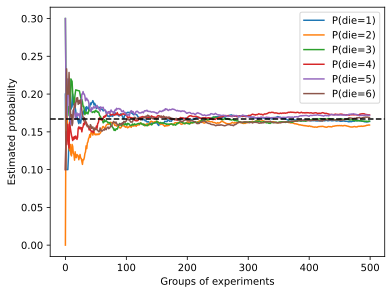

In [33]:
counts = multinomial.Multinomial(10, fair_probs).sample((500,))
cum_counts = counts.cumsum(dim=0)
estimates = cum_counts / cum_counts.sum(dim=1, keepdims=True)

d2l.set_figsize((6, 4.5))
for i in range(6):
    d2l.plt.plot(estimates[:, i].numpy(),
                 label=("P(die=" + str(i + 1) + ")"))
d2l.plt.axhline(y=0.167, color='black', linestyle='dashed')
d2l.plt.gca().set_xlabel('Groups of experiments')
d2l.plt.gca().set_ylabel('Estimated probability')
d2l.plt.legend();

In [36]:
estimates, estimates.size()

(tensor([[0.2000, 0.0000, 0.3000, 0.1000, 0.3000, 0.1000],
         [0.1000, 0.2000, 0.2000, 0.1500, 0.2000, 0.1500],
         [0.1000, 0.1667, 0.2000, 0.1333, 0.1667, 0.2333],
         ...,
         [0.1633, 0.1590, 0.1641, 0.1725, 0.1719, 0.1693],
         [0.1639, 0.1589, 0.1639, 0.1723, 0.1717, 0.1691],
         [0.1638, 0.1590, 0.1640, 0.1724, 0.1718, 0.1690]]),
 torch.Size([500, 6]))

In [39]:
import torch

print(dir(torch.distributions))

['AbsTransform', 'AffineTransform', 'Bernoulli', 'Beta', 'Binomial', 'CatTransform', 'Categorical', 'Cauchy', 'Chi2', 'ComposeTransform', 'ContinuousBernoulli', 'CorrCholeskyTransform', 'CumulativeDistributionTransform', 'Dirichlet', 'Distribution', 'ExpTransform', 'Exponential', 'ExponentialFamily', 'FisherSnedecor', 'Gamma', 'Geometric', 'Gumbel', 'HalfCauchy', 'HalfNormal', 'Independent', 'IndependentTransform', 'Kumaraswamy', 'LKJCholesky', 'Laplace', 'LogNormal', 'LogisticNormal', 'LowRankMultivariateNormal', 'LowerCholeskyTransform', 'MixtureSameFamily', 'Multinomial', 'MultivariateNormal', 'NegativeBinomial', 'Normal', 'OneHotCategorical', 'OneHotCategoricalStraightThrough', 'Pareto', 'Poisson', 'PowerTransform', 'RelaxedBernoulli', 'RelaxedOneHotCategorical', 'ReshapeTransform', 'SigmoidTransform', 'SoftmaxTransform', 'SoftplusTransform', 'StackTransform', 'StickBreakingTransform', 'StudentT', 'TanhTransform', 'Transform', 'TransformedDistribution', 'Uniform', 'VonMises', 'Weib

In [40]:
help(torch.ones)

Help on built-in function ones in module torch:

ones(...)
    ones(*size, *, out=None, dtype=None, layout=torch.strided, device=None, requires_grad=False) -> Tensor
    
    Returns a tensor filled with the scalar value `1`, with the shape defined
    by the variable argument :attr:`size`.
    
    Args:
        size (int...): a sequence of integers defining the shape of the output tensor.
            Can be a variable number of arguments or a collection like a list or tuple.
    
    Keyword arguments:
        out (Tensor, optional): the output tensor.
        dtype (:class:`torch.dtype`, optional): the desired data type of returned tensor.
            Default: if ``None``, uses a global default (see :func:`torch.set_default_tensor_type`).
        layout (:class:`torch.layout`, optional): the desired layout of returned Tensor.
            Default: ``torch.strided``.
        device (:class:`torch.device`, optional): the desired device of returned tensor.
            Default: if ``None